In [2]:
import pandas as pd
sales_file_path="sales_data_with_discounts.csv"
sales_data=pd.read_csv(sales_file_path)

In [3]:
sales_data.head

<bound method NDFrame.head of            Date       Day  SKU City  Volume         BU  Brand       Model  \
0    01-04-2021  Thursday  M01    C      15    Mobiles  RealU       RU-10   
1    01-04-2021  Thursday  M02    C      10    Mobiles  RealU   RU-9 Plus   
2    01-04-2021  Thursday  M03    C       7    Mobiles   YouM       YM-99   
3    01-04-2021  Thursday  M04    C       6    Mobiles   YouM  YM-99 Plus   
4    01-04-2021  Thursday  M05    C       3    Mobiles   YouM      YM-98    
..          ...       ...  ...  ...     ...        ...    ...         ...   
445  15-04-2021  Thursday  L06    C       2  Lifestyle  Jeera   M-Casuals   
446  15-04-2021  Thursday  L07    C       6  Lifestyle   Viva   W-Western   
447  15-04-2021  Thursday  L08    C       2  Lifestyle   Viva    W-Lounge   
448  15-04-2021  Thursday  L09    C       3  Lifestyle  Jeera   M-Formals   
449  15-04-2021  Thursday  L10    C       1  Lifestyle  Jeera     M-Shoes   

     Avg Price  Total Sales Value  Discount R

In [4]:
numerical_columns = sales_data.select_dtypes(include=['number']).columns
print("Numerical columns:", numerical_columns)

Numerical columns: Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [5]:
for col in numerical_columns:
    if col in sales_data.columns:  # Ensure the column exists in the DataFrame
        mean = sales_data[col].mean()
        median = sales_data[col].median()
        mode = sales_data[col].mode()
        standard_deviation = sales_data[col].std()
        print(f"Mean of {col}: {mean}")
        print(f"Median of {col}: {median}")
        print(f"Mode of {col}: {mode}")
        print(f"Standard deviation of {col}: {standard_deviation}")
        print("\n")

Mean of Volume: 5.066666666666666
Median of Volume: 4.0
Mode of Volume: 0    3
Name: Volume, dtype: int64
Standard deviation of Volume: 4.231602391213926


Mean of Avg Price: 10453.433333333332
Median of Avg Price: 1450.0
Mode of Avg Price: 0     400
1     450
2     500
3    1300
4    8100
Name: Avg Price, dtype: int64
Standard deviation of Avg Price: 18079.90483993645


Mean of Total Sales Value: 33812.83555555555
Median of Total Sales Value: 5700.0
Mode of Total Sales Value: 0    24300
Name: Total Sales Value, dtype: int64
Standard deviation of Total Sales Value: 50535.07417255328


Mean of Discount Rate (%): 15.155241895330914
Median of Discount Rate (%): 16.57776564929597
Mode of Discount Rate (%): 0       5.007822
1       5.055218
2       5.059801
3       5.072124
4       5.084108
         ...    
445    19.940610
446    19.965340
447    19.976879
448    19.982257
449    19.992407
Name: Discount Rate (%), Length: 450, dtype: float64
Standard deviation of Discount Rate (%): 4.22060

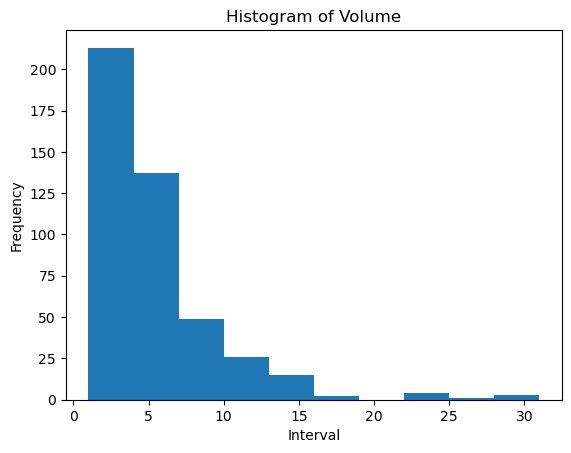

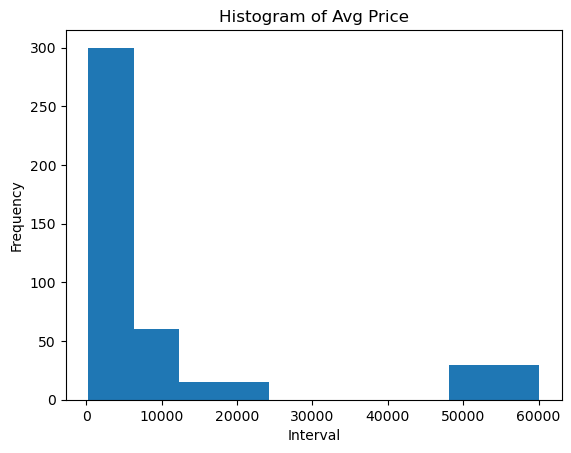

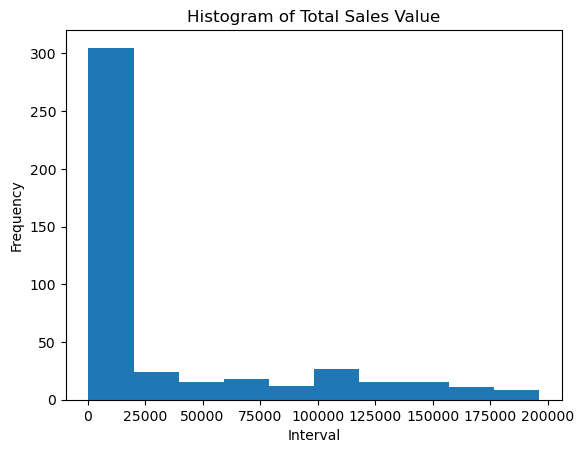

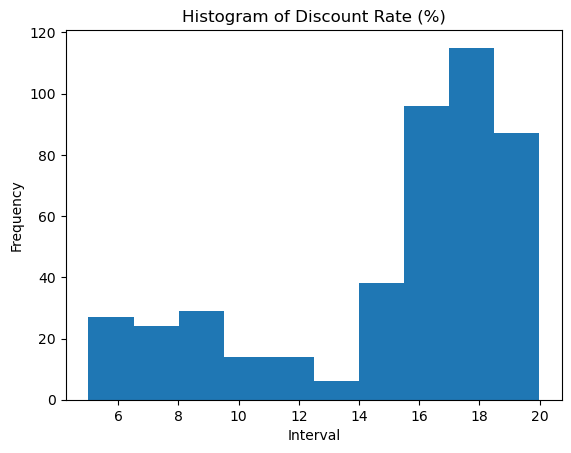

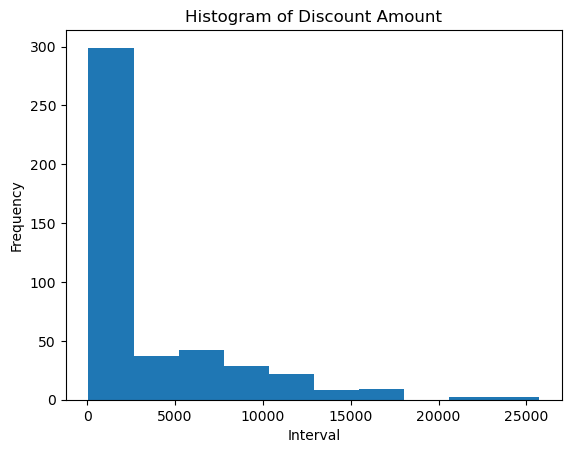

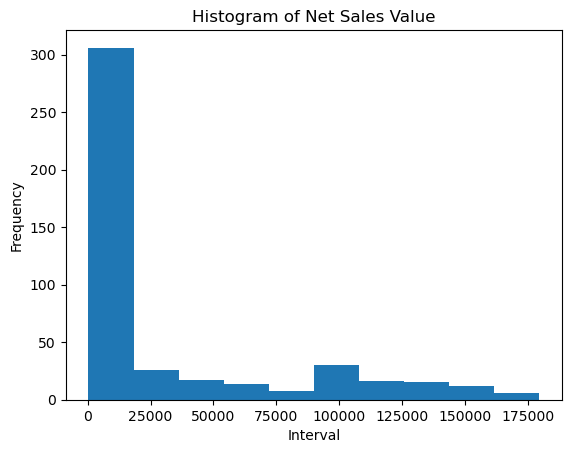

In [6]:
import matplotlib.pyplot as plt
for col in numerical_columns:
    plt.hist(sales_data[col])
    plt.title(f'Histogram of {col}')
    plt.ylabel('Frequency')
    plt.xlabel('Interval')
    plt.show()

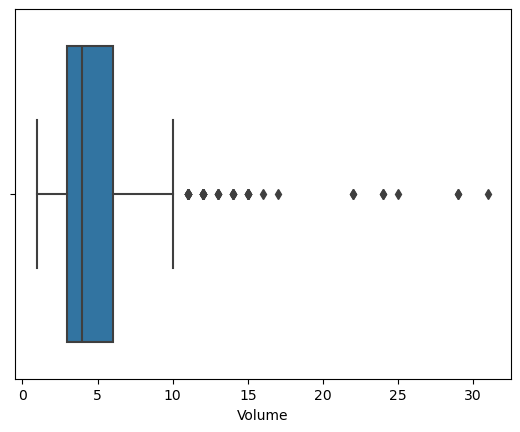

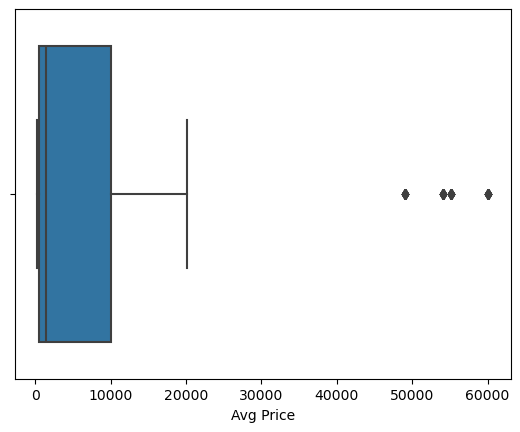

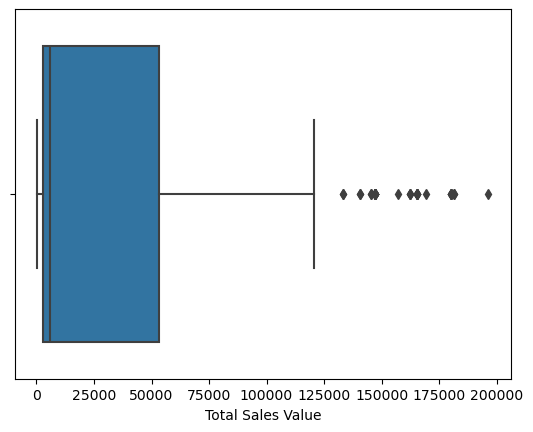

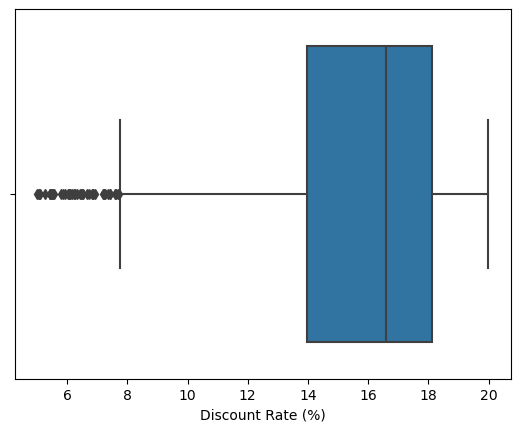

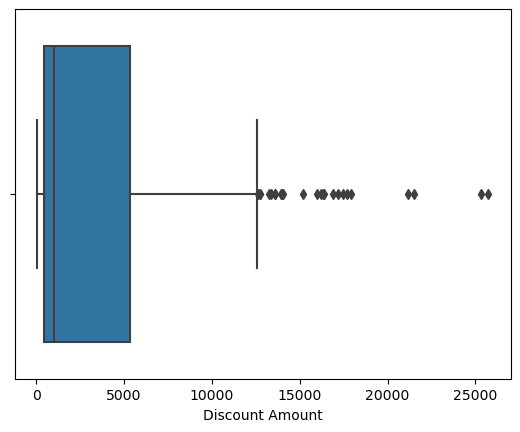

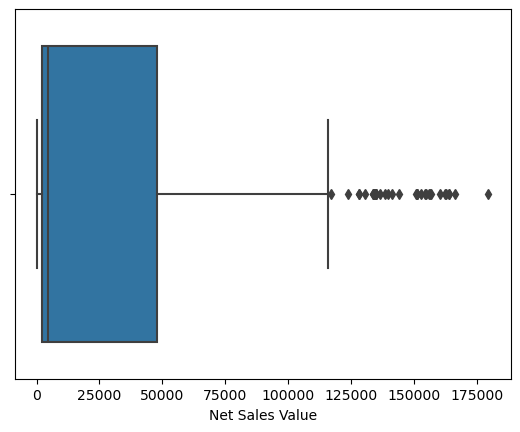

In [7]:
import seaborn as sns
for col in numerical_columns:
    sns.boxplot(x=sales_data[col])
    plt.show()

In [8]:
categorical_columns = sales_data.select_dtypes(include=['object','category']).columns
print('Categorical columns:', categorical_columns)

Categorical columns: Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')


In [9]:
import plotly.express as px
for col in categorical_columns:
    counts= sales_data[col].value_counts()
    px.bar(sales_data x=counts.index, y=counts.values)
    plt.xlabel(col)
    plt.ylabel('count')
    plt.tight_layout()
    plt.show()

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2950355219.py, line 4)

In [ ]:
for col in numerical_columns:
    mu = sales_data[col].mean()
    sigma = sales_data[col].std()
    sales_data[col] = (sales_data[col] - mu) / sigma

print("Standardized Data:")
print(sales_data)    

In [ ]:
categorical_columns = ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']
sales_encoded = pd.get_dummies(sales_data, columns=categorical_columns)
print("one-hot encoded dataframe:")
print(sales_encoded)

In [ ]:
sales_encoded.head()

In [ ]:
print(sales_data.dtypes)
sales_data= sales_data.astype()

In [10]:
categorical_columns = ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']
sales_encoded = pd.get_dummies(sales_data, columns=categorical_columns)
sales_encoded = sales_encoded.astype(int)
print("One-Hot Encoded DataFrame:")
print(sales_encoded)

One-Hot Encoded DataFrame:
     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0        15      12100             181500                 11            21153   
1        10      10100             101000                 11            11676   
2         7      16100             112700                  9            10657   
3         6      20100             120600                  6             8364   
4         3       8100              24300                 17             4372   
..      ...        ...                ...                ...              ...   
445       2       1300               2600                 15              402   
446       6       2600              15600                 17             2660   
447       2       1600               3200                 18              606   
448       3       1900               5700                 16              957   
449       1       3100               3100                 15              475   



In [11]:
import numpy as np
print_heads = {1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29}
df = pd.DataFrame(print_heads)
mean = df.mean()
standard_dev = df.std()
n=15
degree_freedom = n-1
t_critical =2.977
std_error = standard_dev/np.sqrt(n)
error_margin = t_critical *std_error
confidence_interval = (mean - error_margin, mean + error_margin)
print("confidence interval:" , confidence_interval)

confidence interval: (0    1.090189
dtype: float64, 0    1.387144
dtype: float64)


In [13]:
from scipy.stats import norm

# Step 1: Calculate the sample mean
sample_data = [1.13, 1.55, 1.43, 0.92, 1.25, 1.36, 1.32, 0.85, 1.07, 1.48, 1.20, 1.33, 1.18, 1.22, 1.29]
n = len(sample_data)
sample_mean = np.mean(sample_data)

# Step 2: Standard deviation is given
population_std = 0.2

# Step 3: Determine the z-critical value for a 99% confidence interval
confidence_level = 0.99
z_critical = norm.ppf(1 - (1 - confidence_level) / 2)

# Step 4: Calculate the margin of error
margin_of_error = z_critical * (population_std / np.sqrt(n))

# Step 5: Construct the confidence interval
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Print the results
print(f"Sample Mean: {sample_mean:.3f} million characters")
print(f"Z-Critical Value: {z_critical:.3f}")
print(f"Margin of Error: {margin_of_error:.3f} million characters")
print(f"99% Confidence Interval: {confidence_interval[0]:.3f} million characters to {confidence_interval[1]:.3f} million characters")

Sample Mean: 1.239 million characters
Z-Critical Value: 2.576
Margin of Error: 0.133 million characters
99% Confidence Interval: 1.106 million characters to 1.372 million characters
